In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline


In C:\Users\SANGMIN\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\SANGMIN\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\SANGMIN\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\SANGMIN\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\SANGMIN\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classi

In [3]:
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)
plt.style.use("fivethirtyeight")

In [4]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [5]:
df = pd.read_csv("seoul_covid19.csv")
df

,연번,환자,확진일,거주지,여행력,접촉력,조치상황,년월,년월일,월,주,년주
0,24267,78369,2021-01-31,타시도,-,감염경로 조사중,치료중,21-01,21-01-31,1,4,2021-4
1,24266,78472,2021-01-31,강남구,-,감염경로 조사중,치료중,21-01,21-01-31,1,4,2021-4
2,24265,78484,2021-01-31,강남구,-,성동구 소재 병원 관련('21.1월),치료중,21-01,21-01-31,1,4,2021-4
3,24264,78471,2021-01-31,강남구,-,성동구 소재 병원 관련('21.1월),치료중,21-01,21-01-31,1,4,2021-4
4,24263,78415,2021-01-31,타시도,-,타시도 확진자 접촉,치료중,21-01,21-01-31,1,4,2021-4
...,...,...,...,...,...,...,...,...,...,...,...,...
24262,5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,20-01,20-01-31,1,5,2020-5
24263,4,7,2020-01-30,마포구,중국,해외유입,퇴원,20-01,20-01-30,1,5,2020-5
24264,3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,20-01,20-01-30,1,5,2020-5
24265,2,5,2020-01-30,중랑구,중국,해외유입,퇴원,20-01,20-01-30,1,5,2020-5


In [6]:
day_count = df["확진일"].value_counts().sort_index()
day_count

2020-01-24      1
2020-01-30      3
2020-01-31      3
2020-02-02      1
2020-02-05      2
             ... 
2021-01-27    104
2021-01-28    113
2021-01-29    151
2021-01-30    101
2021-01-31    107
Name: 확진일, Length: 342, dtype: int64

In [7]:
df["확진일"] = pd.to_datetime(df["확진일"])

In [8]:
first_day = df.iloc[-1,2]
first_day

Timestamp('2020-01-24 00:00:00')

In [9]:
last_day = df.iloc[0,2]
last_day

Timestamp('2021-01-31 00:00:00')

In [10]:
days = pd.date_range(first_day, last_day)
days

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02',
               ...
               '2021-01-22', '2021-01-23', '2021-01-24', '2021-01-25',
               '2021-01-26', '2021-01-27', '2021-01-28', '2021-01-29',
               '2021-01-30', '2021-01-31'],
              dtype='datetime64[ns]', length=374, freq='D')

In [11]:
df_days = pd.DataFrame({"확진일자":days})
df_days = df_days.astype(str)
df_days

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28
...,...
369,2021-01-27
370,2021-01-28
371,2021-01-29
372,2021-01-30


In [12]:
daliy_case = day_count
df_daliy_case = pd.DataFrame({"확진수": daliy_case})
df_daliy_case

,확진수
2020-01-24,1
2020-01-30,3
2020-01-31,3
2020-02-02,1
2020-02-05,2
...,...
2021-01-27,104
2021-01-28,113
2021-01-29,151
2021-01-30,101


In [13]:
df_days.merge(df_daliy_case,left_on="확진일자",right_on=df_daliy_case.index,how="left")

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN
...,...,...
369,2021-01-27,104.0
370,2021-01-28,113.0
371,2021-01-29,151.0
372,2021-01-30,101.0


In [14]:
all_day = df_days.merge(df_daliy_case,left_on="확진일자",right_on=df_daliy_case.index,how="left")
all_day["확진수"] = all_day["확진수"].fillna(0)
all_day

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,0.0
2,2020-01-26,0.0
3,2020-01-27,0.0
4,2020-01-28,0.0
...,...,...
369,2021-01-27,104.0
370,2021-01-28,113.0
371,2021-01-29,151.0
372,2021-01-30,101.0


In [15]:
all_day["누적확진수"] = all_day["확진수"].cumsum()
all_day

,확진일자,확진수,누적확진수
0,2020-01-24,1.0,1.0
1,2020-01-25,0.0,1.0
2,2020-01-26,0.0,1.0
3,2020-01-27,0.0,1.0
4,2020-01-28,0.0,1.0
...,...,...,...
369,2021-01-27,104.0,23795.0
370,2021-01-28,113.0,23908.0
371,2021-01-29,151.0,24059.0
372,2021-01-30,101.0,24160.0


In [16]:
all_day["확진일자"] = all_day["확진일자"].astype(str)
all_day.head()

,확진일자,확진수,누적확진수
0,2020-01-24,1.0,1.0
1,2020-01-25,0.0,1.0
2,2020-01-26,0.0,1.0
3,2020-01-27,0.0,1.0
4,2020-01-28,0.0,1.0


In [17]:
all_cum_day = all_day[["확진일자","확진수","누적확진수"]]
all_cum_day

,확진일자,확진수,누적확진수
0,2020-01-24,1.0,1.0
1,2020-01-25,0.0,1.0
2,2020-01-26,0.0,1.0
3,2020-01-27,0.0,1.0
4,2020-01-28,0.0,1.0
...,...,...,...
369,2021-01-27,104.0,23795.0
370,2021-01-28,113.0,23908.0
371,2021-01-29,151.0,24059.0
372,2021-01-30,101.0,24160.0


<AxesSubplot:>

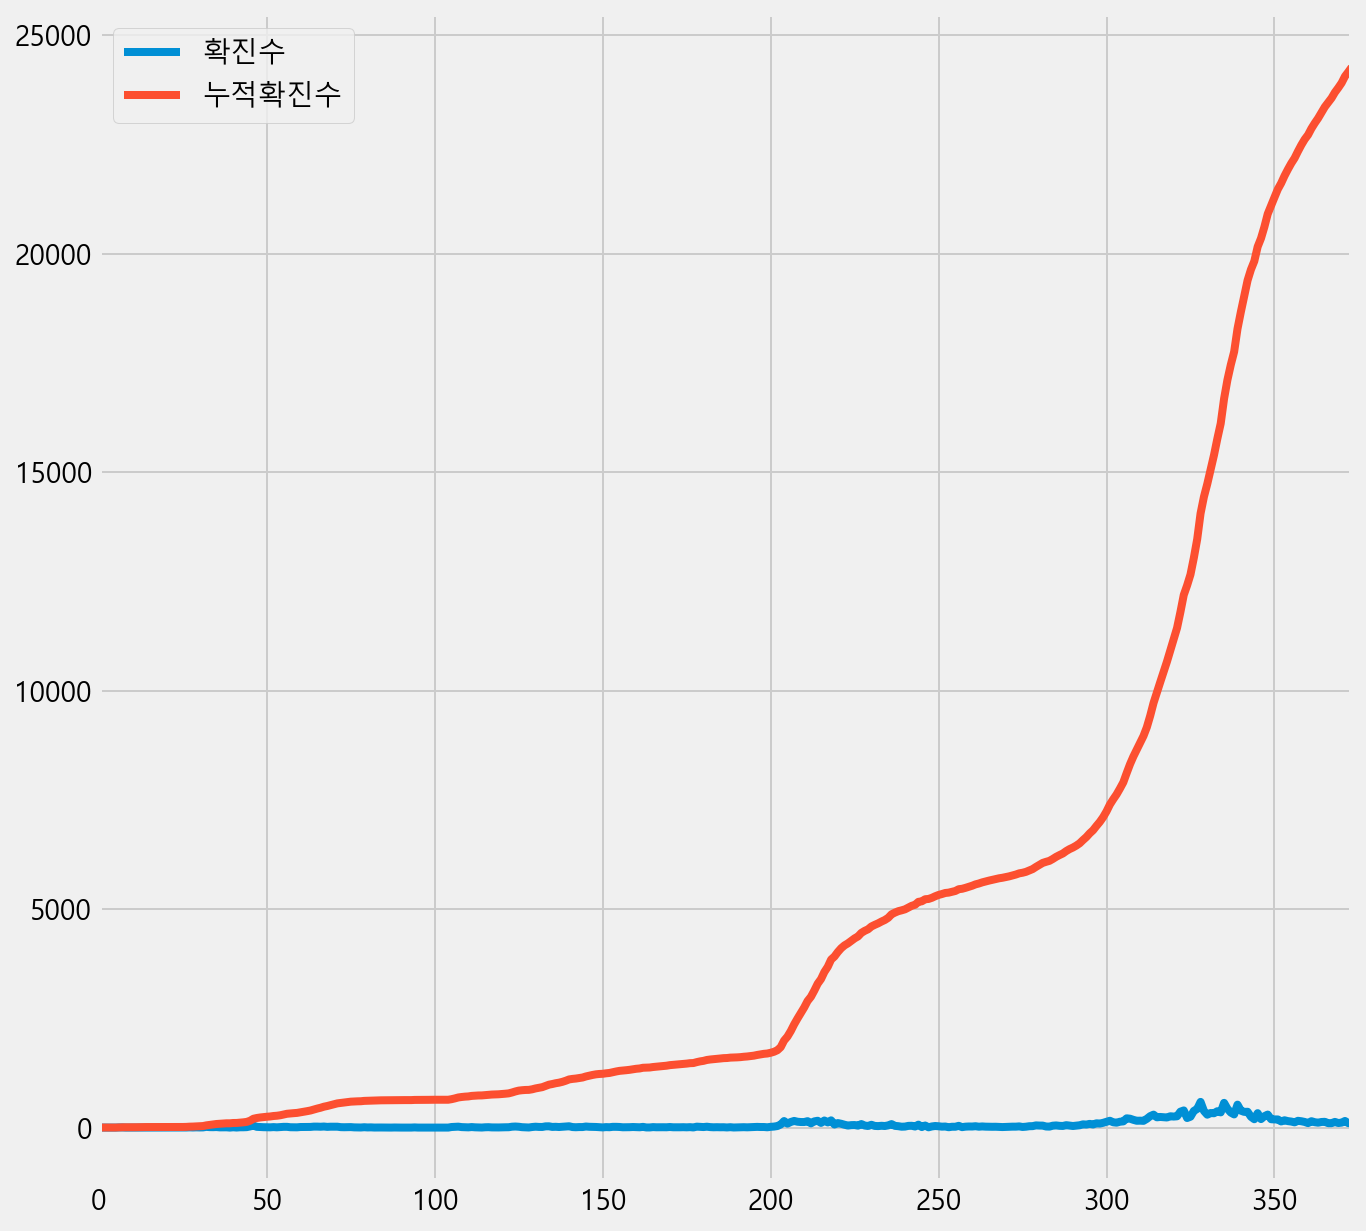

In [18]:
all_cum_day.plot(figsize=(10,10))

In [19]:
all_cum_day = all_cum_day.set_index("확진일자")
all_cum_day

,확진수,누적확진수
확진일자,,
2020-01-24,1.0,1.0
2020-01-25,0.0,1.0
2020-01-26,0.0,1.0
2020-01-27,0.0,1.0
2020-01-28,0.0,1.0
...,...,...
2021-01-27,104.0,23795.0
2021-01-28,113.0,23908.0
2021-01-29,151.0,24059.0


C:\Users\SANGMIN\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='확진일자'>

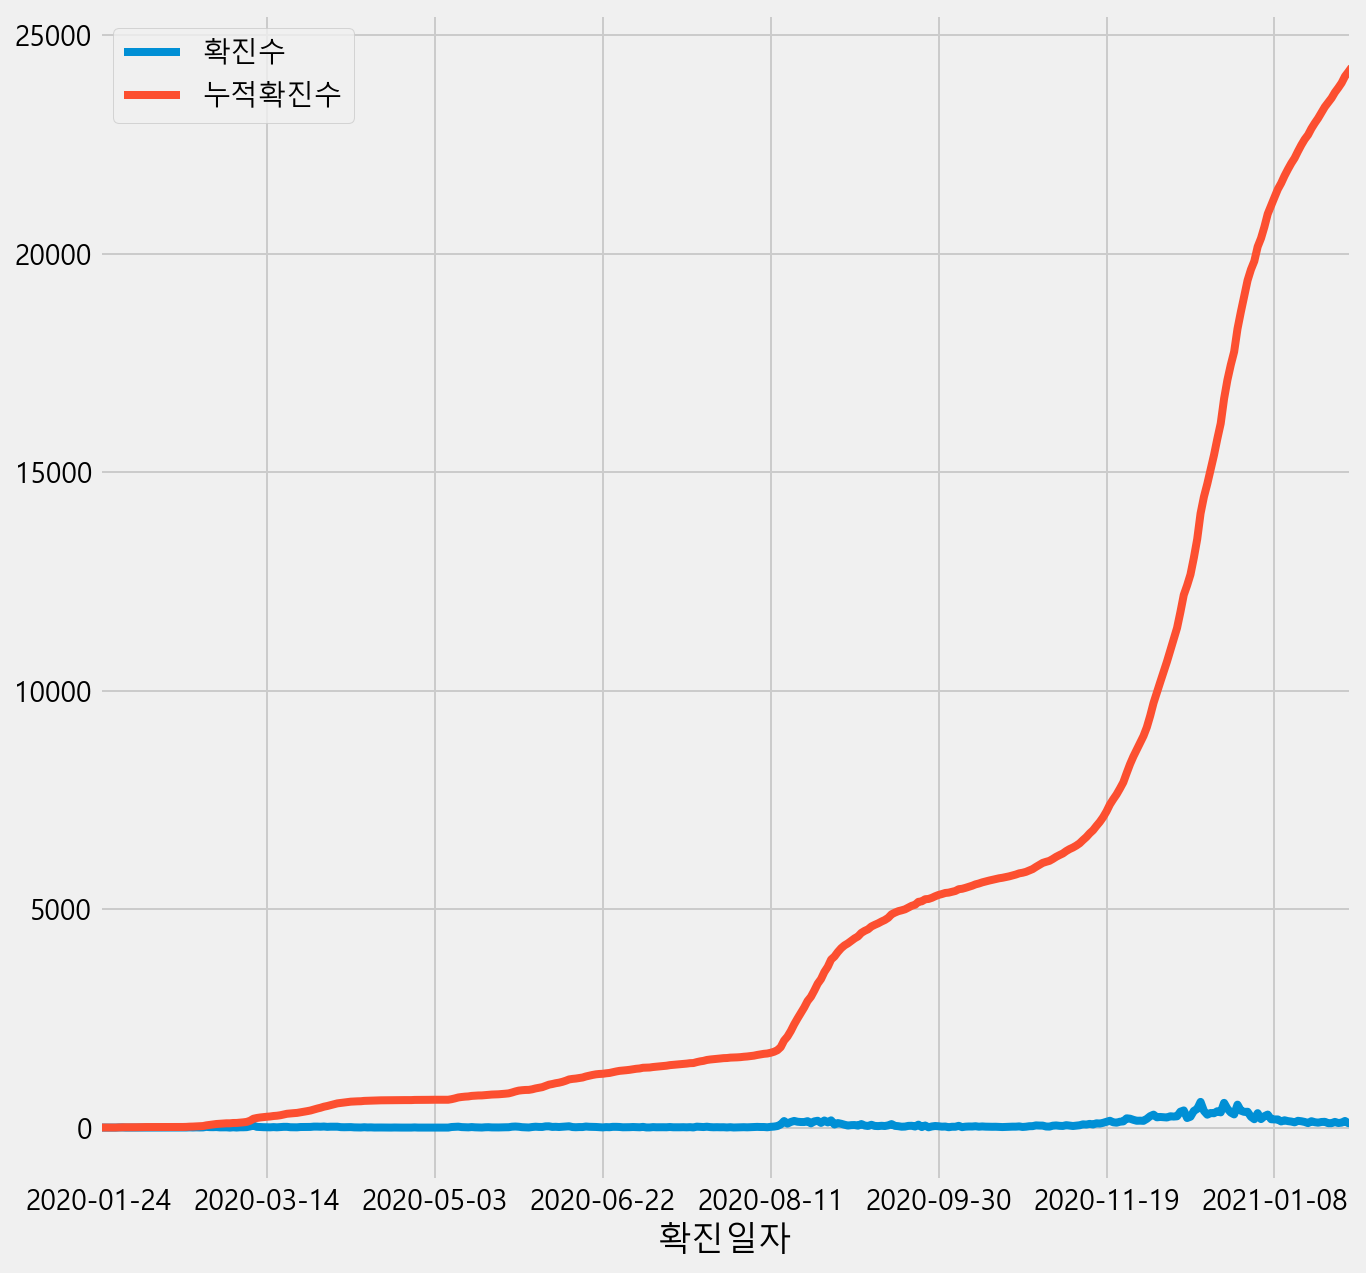

In [20]:
all_cum_day.plot(figsize=(10,10))

C:\Users\SANGMIN\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'확진수'}, xlabel='확진일자'>

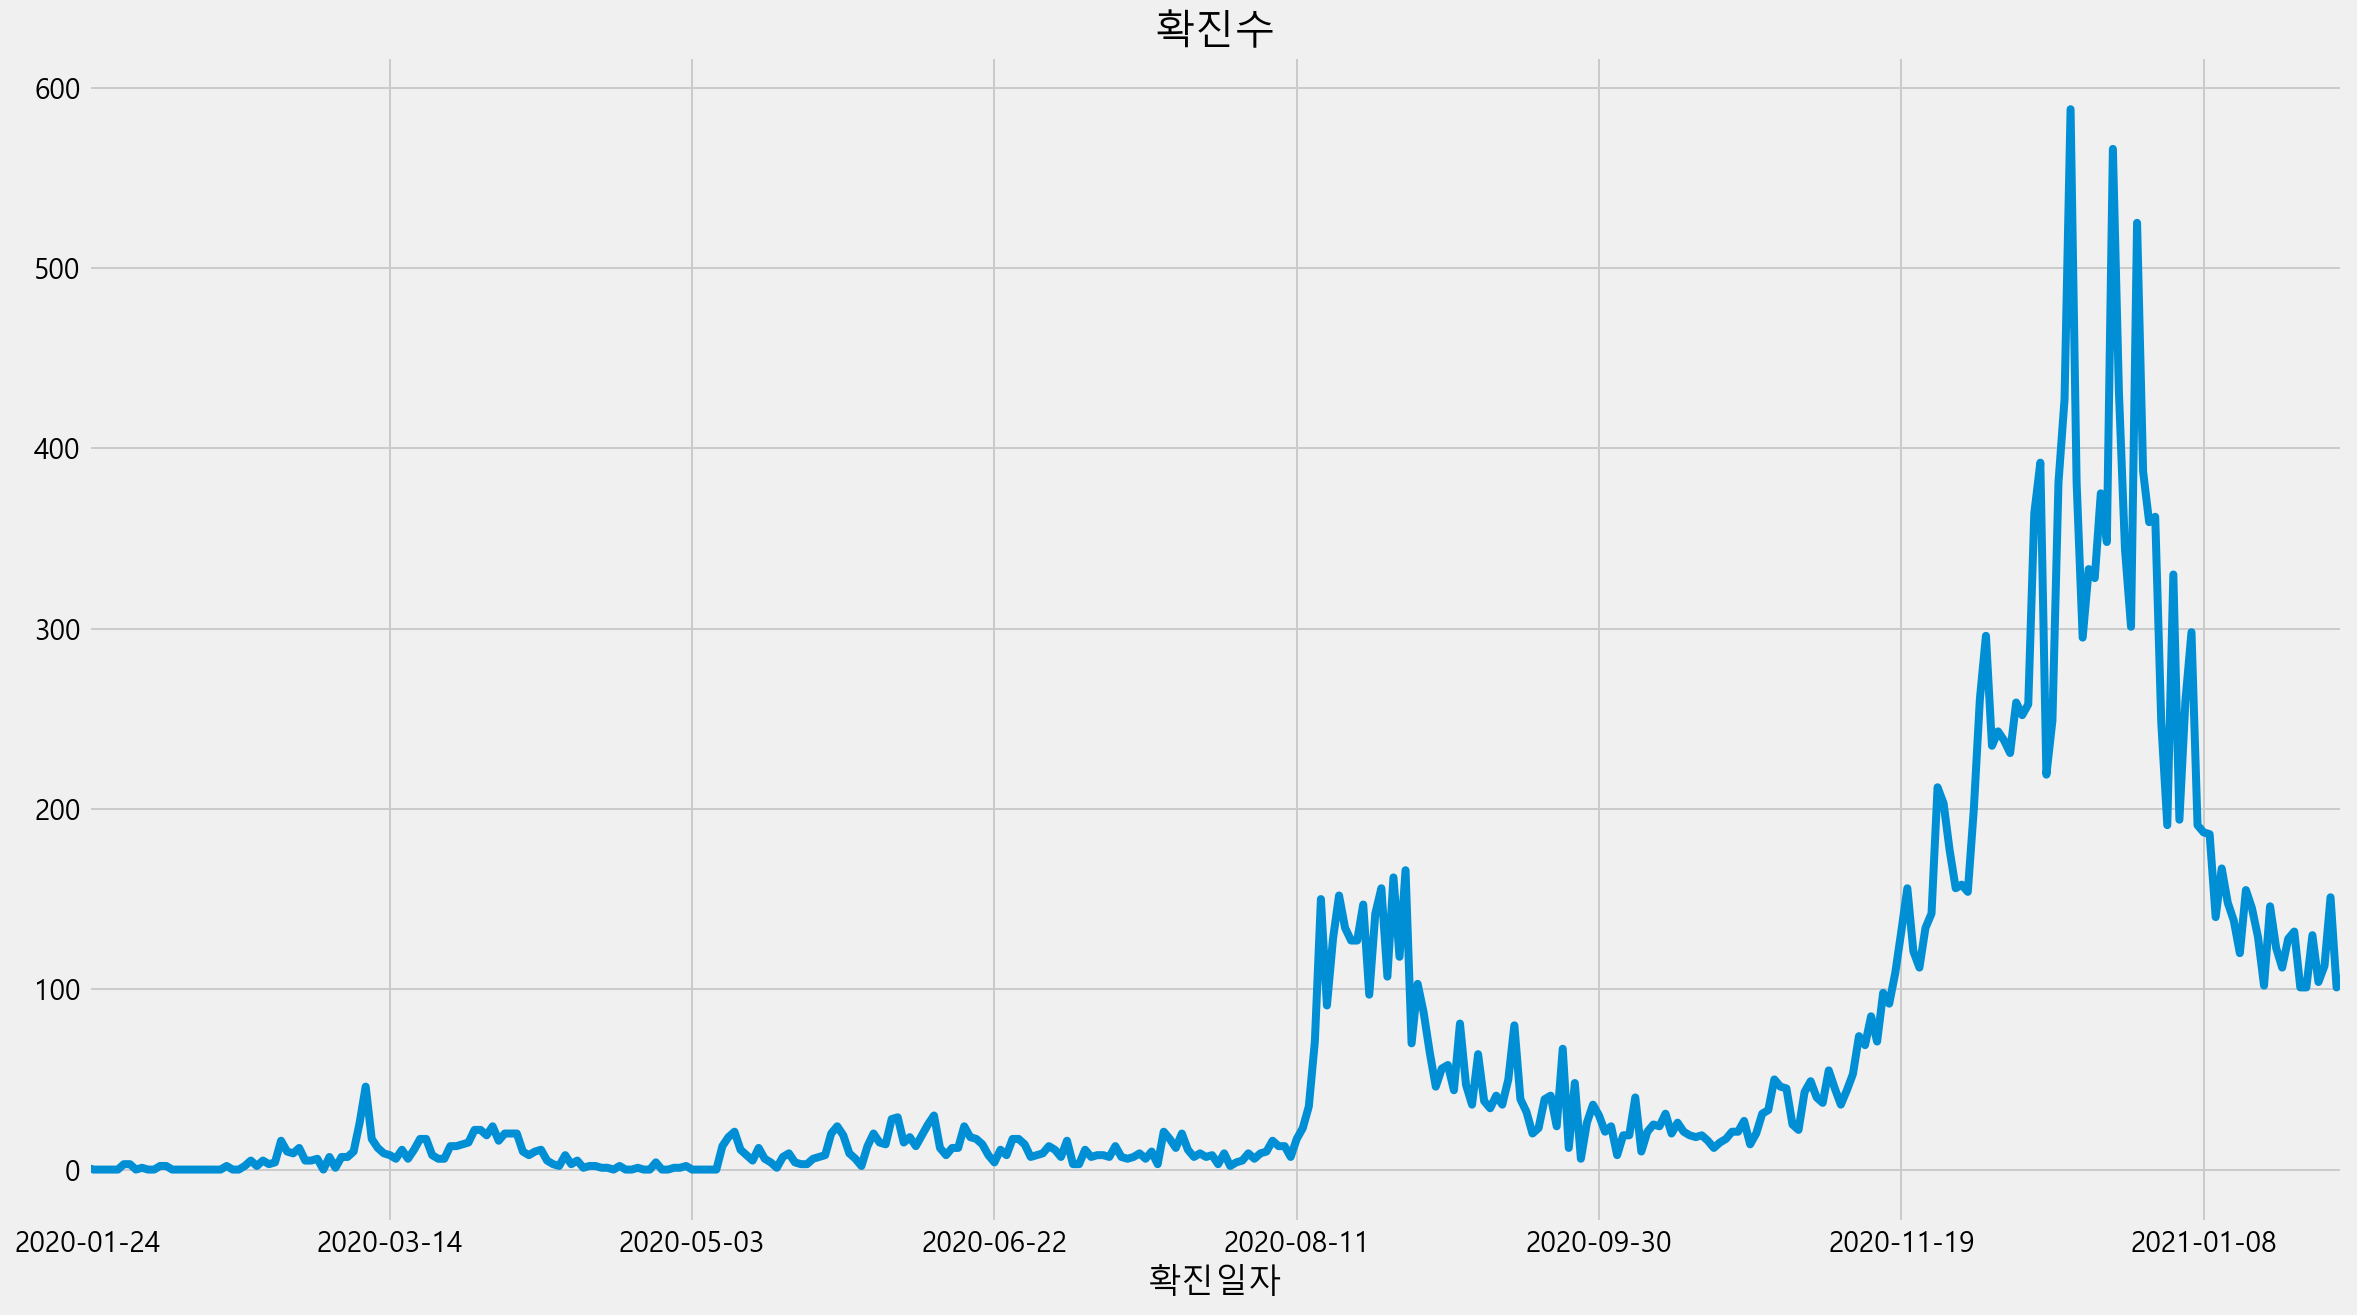

In [21]:
all_cum_day["확진수"].plot(figsize=(18,10),title="확진수")

C:\Users\SANGMIN\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'누적확진수'}, xlabel='확진일자'>

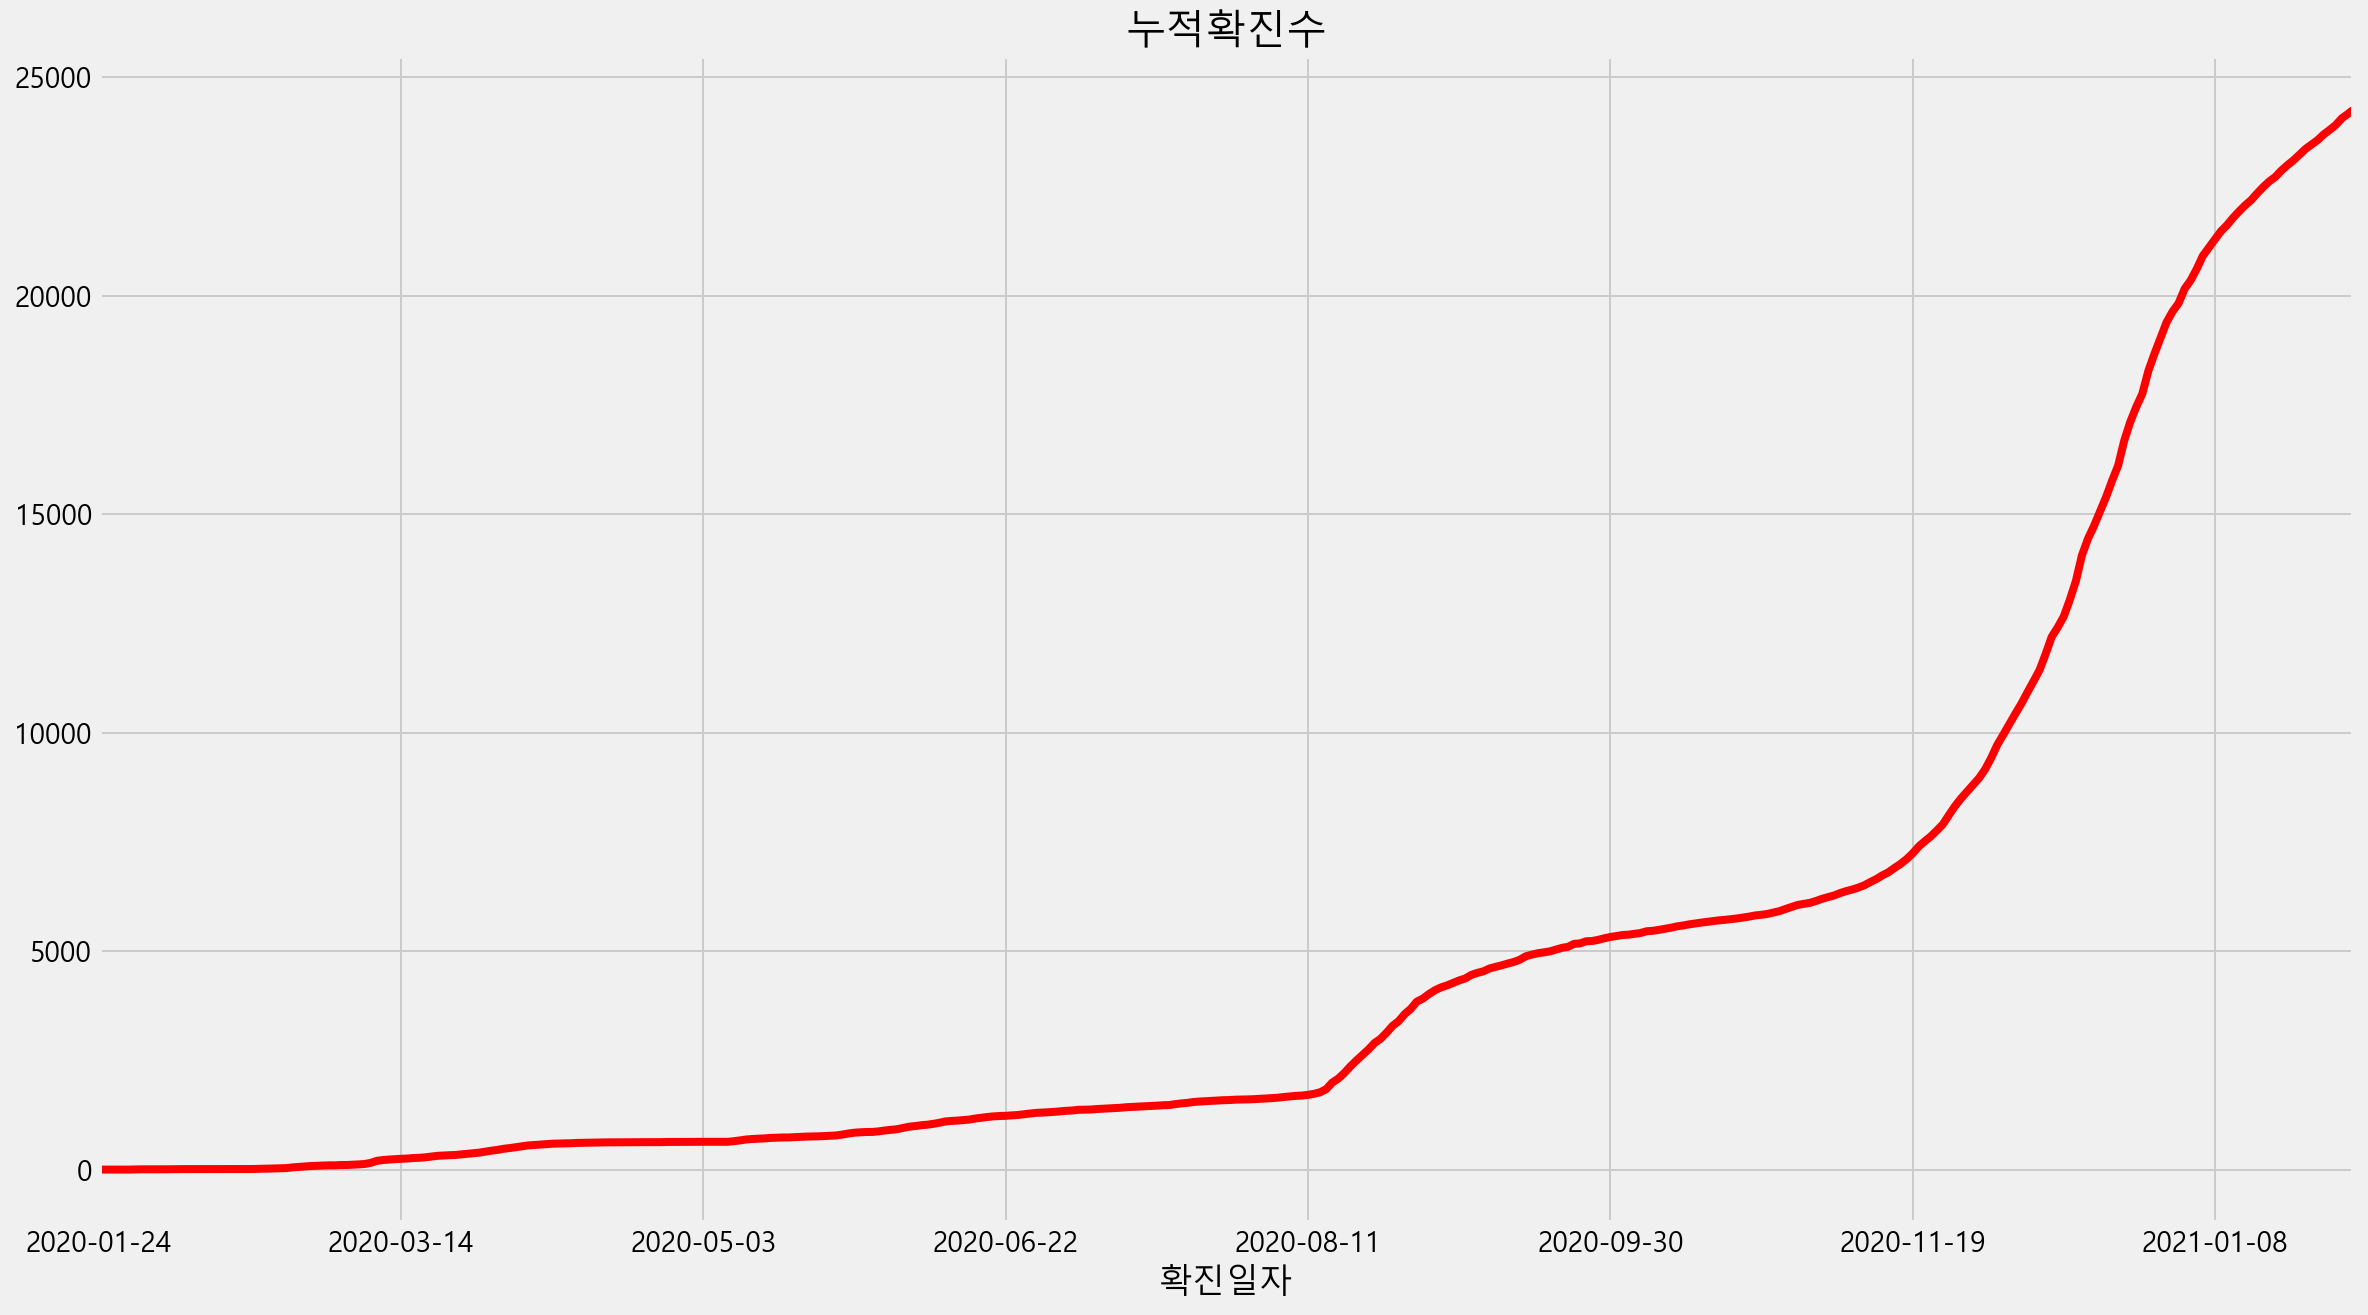

In [22]:
all_cum_day ["누적확진수"].plot(figsize=(18,10),title="누적확진수",color="red")

In [23]:
all_day

,확진일자,확진수,누적확진수
0,2020-01-24,1.0,1.0
1,2020-01-25,0.0,1.0
2,2020-01-26,0.0,1.0
3,2020-01-27,0.0,1.0
4,2020-01-28,0.0,1.0
...,...,...,...
369,2021-01-27,104.0,23795.0
370,2021-01-28,113.0,23908.0
371,2021-01-29,151.0,24059.0
372,2021-01-30,101.0,24160.0


In [25]:
all_day["확진년월"]

0      20-01
1      20-01
2      20-01
3      20-01
4      20-01
       ...  
369    21-01
370    21-01
371    21-01
372    21-01
373    21-01
Name: 확진년월, Length: 374, dtype: object

In [26]:
all_day["확진요일"]

0      4
1      5
2      6
3      0
4      1
      ..
369    2
370    3
371    4
372    5
373    6
Name: 확진요일, Length: 374, dtype: int64

In [27]:
all_day_week = all_day.groupby(["확진년월","확진요일"])["확진수"].sum()
all_day_week = all_day_week.unstack().astype(int)
all_day_week

확진요일,0,1,2,3,4,5,6
확진년월,,,,,,,
20-01,0,0,0,3,4,0,0
20-02,4,16,14,16,14,10,6
20-03,68,89,48,44,48,45,49
20-04,15,17,28,28,26,23,19
20-05,26,37,33,34,32,36,31
20-06,55,65,66,74,92,69,38
20-07,38,42,42,57,34,40,28
20-08,389,331,273,334,332,480,276
20-09,182,261,235,216,138,160,114


In [28]:
all_day_week.columns

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='확진요일')

In [29]:
dayofweek = "월 화 수 목 금 토 일"
dayofweek = dayofweek.split()
dayofweek

['월', '화', '수', '목', '금', '토', '일']

In [30]:
all_day_week.columns = dayofweek

In [31]:
all_day_week

,월,화,수,목,금,토,일
확진년월,,,,,,,
20-01,0,0,0,3,4,0,0
20-02,4,16,14,16,14,10,6
20-03,68,89,48,44,48,45,49
20-04,15,17,28,28,26,23,19
20-05,26,37,33,34,32,36,31
20-06,55,65,66,74,92,69,38
20-07,38,42,42,57,34,40,28
20-08,389,331,273,334,332,480,276
20-09,182,261,235,216,138,160,114


In [32]:
all_day_week.style.background_gradient(cmap="Blues")

,월,화,수,목,금,토,일
확진년월,,,,,,,
20-01,0,0,0,3,4,0,0
20-02,4,16,14,16,14,10,6
20-03,68,89,48,44,48,45,49
20-04,15,17,28,28,26,23,19
20-05,26,37,33,34,32,36,31
20-06,55,65,66,74,92,69,38
20-07,38,42,42,57,34,40,28
20-08,389,331,273,334,332,480,276
20-09,182,261,235,216,138,160,114
